In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
df = data.DataReader('TSLA','yahoo', start = '2000-01-01', end = '2022-03-31' )
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [4]:
df = df.drop(['Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0
2010-06-30,6.084,4.660,5.158,4.766,85935500.0
2010-07-01,5.184,4.054,5.000,4.392,41094000.0
2010-07-02,4.620,3.742,4.600,3.840,25699000.0
2010-07-06,4.000,3.166,4.000,3.222,34334500.0


In [5]:
df


,High,Low,Open,Close,Volume
Date,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0
...,...,...,...,...,...
2022-03-25,1021.799988,997.320007,1008.000000,1010.640015,20677200.0
2022-03-28,1097.880005,1053.599976,1065.099976,1091.839966,34168700.0
2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0


In [6]:

tsla = yf.Ticker("TSLA")


In [7]:
# show major holders
tsla.major_holders

,0,1
0,17.26%,% of Shares Held by All Insider
1,43.12%,% of Shares Held by Institutions
2,52.12%,% of Float Held by Institutions
3,3432,Number of Institutions Holding Shares


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2022-03-25    983.108096
2022-03-28    982.306496
2022-03-29    981.163596
2022-03-30    979.804395
2022-03-31    978.359495
Name: Close, Length: 2961, dtype: float64

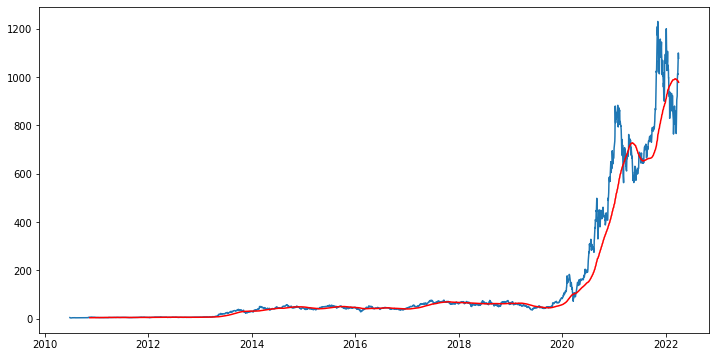

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2022-03-25    860.643047
2022-03-28    863.052797
2022-03-29    865.462196
2022-03-30    867.935346
2022-03-31    870.298996
Name: Close, Length: 2961, dtype: float64

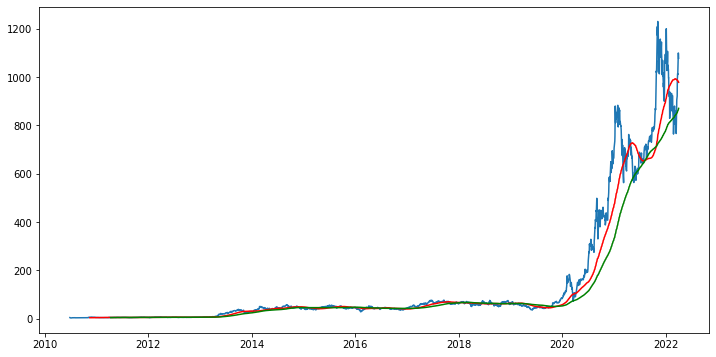

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

df.shape

In [12]:
#splitting data into training and testing Close
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2368, 1)
(593, 1)


In [13]:
data_training.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191224],
       [0.02174973],
       [0.01668473],
       ...,
       [0.93098591],
       [0.91121344],
       [0.91828282]])

In [16]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    

In [17]:
#ml model

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))




model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))




model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))





model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))




model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam',loss =  'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
71/71 [==============================] - 30s 292ms/step - loss: 0.0564
Epoch 2/50
71/71 [==============================] - 21s 289ms/step - loss: 0.0123
Epoch 3/50
71/71 [==============================] - 19s 267ms/step - loss: 0.0101
Epoch 4/50
71/71 [==============================] - 20s 285ms/step - loss: 0.0101
Epoch 5/50
71/71 [==============================] - 20s 275ms/step - loss: 0.0089
Epoch 6/50
71/71 [==============================] - 20s 280ms/step - loss: 0.0085
Epoch 7/50
71/71 [==============================] - 19s 274ms/step - loss: 0.0090
Epoch 8/50
71/71 [==============================] - 19s 265ms/step - loss: 0.0084
Epoch 9/50
71/71 [==============================] - 18s 257ms/step - loss: 0.0080
Epoch 10/50
71/71 [==============================] - 20s 278ms/step - loss: 0.0073
Epoch 11/50
71/71 [==============================] - 20s 288ms/step - loss: 0.0071
Epoch 12/50
71/71 [==============================] - 21s 289ms/step - loss: 0.0070
Epoch 13/50
7

In [22]:
model.save('keras_model.h5')

In [23]:
data_testing.head()

,Close
Date,
2019-11-22,66.608002
2019-11-25,67.267998
2019-11-26,65.783997
2019-11-27,66.258003
2019-11-29,65.987999


In [24]:
past_100_days = data_training.tail(100) 


In [25]:
final_df = past_100_days.concat(data_testing, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [23]:
final_df.head()

,Close
0,46.980000
1,46.619999
2,46.068001
3,46.012001
4,47.784000


In [24]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.95746202e-03],
       [3.65433681e-03],
       [3.18954717e-03],
       [3.14239464e-03],
       [4.63444124e-03],
       [4.58055310e-03],
       [5.67180002e-03],
       [7.08975163e-03],
       [6.90114153e-03],
       [7.31877865e-03],
       [7.09648725e-03],
       [7.87787655e-03],
       [7.45687002e-03],
       [8.21299675e-03],
       [9.00617418e-03],
       [2.93357448e-03],
       [2.80222193e-03],
       [4.10397212e-03],
       [5.19690535e-03],
       [5.08744275e-03],
       [3.78064005e-03],
       [3.86315697e-03],
       [2.84937446e-03],
       [3.25859285e-03],
       [3.70822495e-03],
       [4.53003116e-03],
       [3.97598577e-03],
       [2.96556946e-03],
       [3.97430267e-03],
       [1.38427032e-03],
       [7.14026715e-04],
       [1.43815846e-03],
       [2.59845428e-03],
       [2.43510354e-03],
       [1.58803797e-03],
       [1.81032936e-03],
       [0.00000000e+00],
       [6.06250431e-04],
       [4.51321621e-04],
       [7.05607998e-04],


In [25]:
input_data.shape

(693, 1)

In [26]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [27]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(593, 100, 1)
(593,)


In [28]:
# making prediction

y_predicted = model.predict(x_test)

In [29]:
y_predicted.shape

(593, 1)

In [30]:
y_test

array([0.0204845 , 0.02104022, 0.01979067, 0.02018979, 0.01996245,
       0.02079267, 0.02101665, 0.02048281, 0.02003486, 0.02096444,
       0.02157743, 0.02314525, 0.02379529, 0.02497074, 0.0247535 ,
       0.02864529, 0.02822259, 0.03060717, 0.03244108, 0.0327021 ,
       0.03499743, 0.0360129 , 0.03697111, 0.0368768 , 0.03423625,
       0.03484755, 0.0368566 , 0.03900373, 0.0404402 , 0.04339062,
       0.04727735, 0.0454586 , 0.0449214 , 0.05278748, 0.05498682,
       0.05171644, 0.05087274, 0.05036922, 0.0565496 , 0.06031508,
       0.06075967, 0.05951685, 0.05837171, 0.05986713, 0.06223992,
       0.07231377, 0.07395737, 0.09575373, 0.11378291, 0.08812509,
       0.09052652, 0.09037663, 0.09428525, 0.09480731, 0.09361332,
       0.09979539, 0.09912683, 0.10895648, 0.11889561, 0.11586269,
       0.11613044, 0.1048121 , 0.09910662, 0.09555164, 0.07874506,
       0.07689096, 0.08962724, 0.08994552, 0.09061744, 0.08641412,
       0.08286756, 0.06678848, 0.07307494, 0.07120568, 0.05879

In [31]:
y_predicted

array([[0.05184653],
       [0.05209237],
       [0.05231392],
       [0.05250537],
       [0.05266148],
       [0.05277875],
       [0.05285615],
       [0.05289549],
       [0.05290052],
       [0.05287576],
       [0.05282658],
       [0.05275941],
       [0.05268204],
       [0.0526033 ],
       [0.05253237],
       [0.05247754],
       [0.05244708],
       [0.05244926],
       [0.05249104],
       [0.05257882],
       [0.05271736],
       [0.0529094 ],
       [0.05315639],
       [0.05345771],
       [0.05381024],
       [0.05420658],
       [0.05463526],
       [0.05508417],
       [0.0555432 ],
       [0.05600557],
       [0.05646835],
       [0.05693376],
       [0.05740604],
       [0.05788749],
       [0.0583822 ],
       [0.05889791],
       [0.05944093],
       [0.06001227],
       [0.06060776],
       [0.06122303],
       [0.06185761],
       [0.06251365],
       [0.06319252],
       [0.0638919 ],
       [0.06460716],
       [0.06533352],
       [0.06607269],
       [0.066

In [32]:
scaler.scale_


array([0.00084201])

In [33]:
scale_factor = 1/0.02678631
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

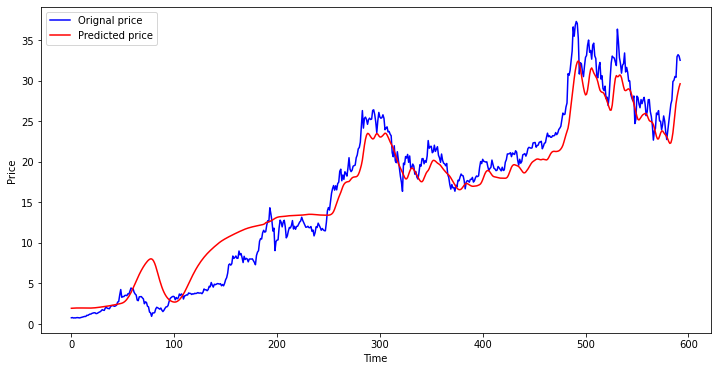

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()